# Problem Statement:
Avocado is a fruit consumed by people heavily in the United States. 

Content
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation

AveragePrice - the average price of a single avocado

type - conventional or organic

year - the year

Region - the city or region of the observation

Total Volume - Total number of avocados sold

4046 - Total number of avocados with PLU 4046sold

4225 - Total number of avocados with PLU 4225 sold

4770 - Total number of avocados with PLU 4770 sold


Our task is to make a model that can consider the data provided and predict the "AVERAGE PRICE".

# Importing Required Libraries

In [456]:
#data processing
import pandas as pd
import numpy as np

#data visualisation
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport

#algorithms
import sklearn
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')


# Loading the Dataset

In [457]:
df=pd.read_csv('avocado.csv')

In [458]:
#checking the first 10 rows
df.head(10)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany
5,5.0,22-11-2015,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015.0,Albany
6,6.0,15-11-2015,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015.0,Albany
7,7.0,08-11-2015,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015.0,Albany
8,8.0,01-11-2015,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015.0,Albany
9,9.0,25-10-2015,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015.0,Albany


In [459]:
#checking size of the dataset
df.shape

(16468, 14)

In [460]:
#attribute check
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [461]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.000000,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,26.995386,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,14.848287,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324
min,0.000000,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,14.000000,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,29.000000,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,39.000000,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,51.000000,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


We can observe certain skewness in the data with the mean and median values not in the same range.

In [462]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16468 entries, 0 to 16467
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1517 non-null   float64
 1   Date          1517 non-null   object 
 2   AveragePrice  1517 non-null   float64
 3   Total Volume  1517 non-null   float64
 4   4046          1517 non-null   float64
 5   4225          1517 non-null   float64
 6   4770          1517 non-null   float64
 7   Total Bags    1517 non-null   float64
 8   Small Bags    1517 non-null   float64
 9   Large Bags    1517 non-null   float64
 10  XLarge Bags   1517 non-null   float64
 11  type          1517 non-null   object 
 12  year          1517 non-null   float64
 13  region        1517 non-null   object 
dtypes: float64(11), object(3)
memory usage: 1.8+ MB


The dataset contains features that are-

Numeric: 'AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year'

Date: 'Date'

Categorical: 'type', 'year' 

‘Unamed: 0’ is an index column that we will not be requiring for this model.

In [463]:
df=df.drop('Unnamed: 0',axis=1)

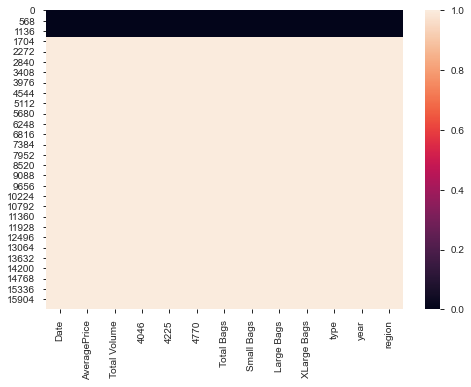

In [464]:
#checking null values
sns.heatmap(df.isnull())

We can see that the dataset contains null rows. Let us remove them.

In [465]:
df.dropna(axis=0,how='all', inplace=True)

In [466]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015.0,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015.0,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015.0,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015.0,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016.0,Charlotte
1513,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016.0,Charlotte
1514,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016.0,Charlotte
1515,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016.0,Charlotte


In [467]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

We now have a dataset that contains 1517 non-null rows for 13 features.

# EDA (Exploratory Data Analysis)

We will run a quick report to have an overview of the data before we dive into analysis further.

In [468]:
profile=ProfileReport(df,title='Profiling Report')
profile

This visual report helps to quickly summarize the data.

The data for most features is skewed to the right whereas the distribution for the Target variable 'Average Price' is seemingly normal.

There is high correlation between the volume, bags and product types.

'Type' feature has a single value and hence, can be excluded for the purpose of predictions.

There are no missing values. 

We will need to use scaling to standardise the values for the various attributes.

The categorical variable 'Year', with 2 distinct values, will need to be encoded to numbers.

We will further explore the relationship between Date and Target variable to check for any possible influences .


In [469]:
#dropping 'type' column
df=df.drop('type',axis=1)

In [470]:
df["AveragePrice"].value_counts()

1.08    46
0.99    44
1.03    44
1.09    43
1.10    43
        ..
1.61     1
1.66     1
1.60     1
0.64     1
1.64     1
Name: AveragePrice, Length: 113, dtype: int64

In [471]:
df["year"].value_counts()

2015.0    1270
2016.0     247
Name: year, dtype: int64

Text(0.5, 1.0, 'Year')

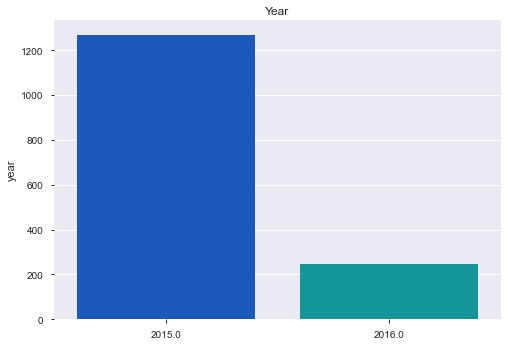

In [472]:
#Univariate Analysis
sns.barplot(df["year"].value_counts().index,df["year"].value_counts(), palette='winter').set_title("Year")

The dataset largely contains the Price data for the Year 2015.

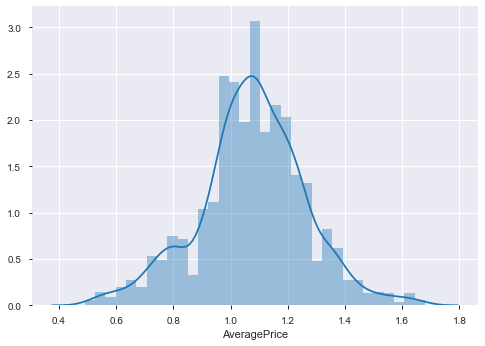

In [473]:
#plotting target variable 
sns.distplot(df['AveragePrice'])

Average Price has a normal distribution with possibly some outliers. Most of the values are in the range of 1.00-1.20.

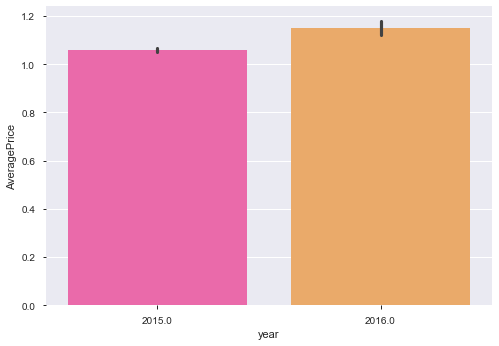

In [474]:
#Bivariate Analysis
sns.barplot(x='year',y='AveragePrice',data=df, palette='spring')

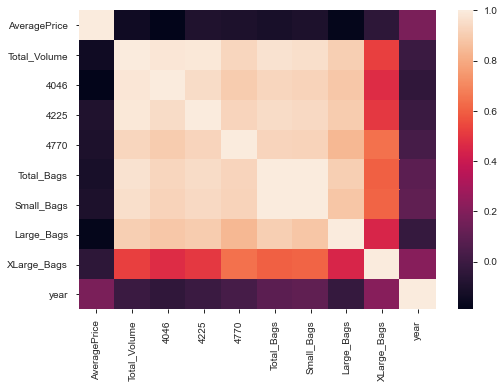

In [475]:
#Multivariate Analysis
sns.heatmap(df.corr())

We see that year has the highest positive correlation with price. Rest of the numeric variables have a weak negative correlation with price.

In [476]:
bins = (0.4, 0.9, 1.3, 1.8)
group_names = ['Low', 'Medium', 'High']
df['AveragePrice'] = pd.cut(df['AveragePrice'], bins = bins, labels = group_names)

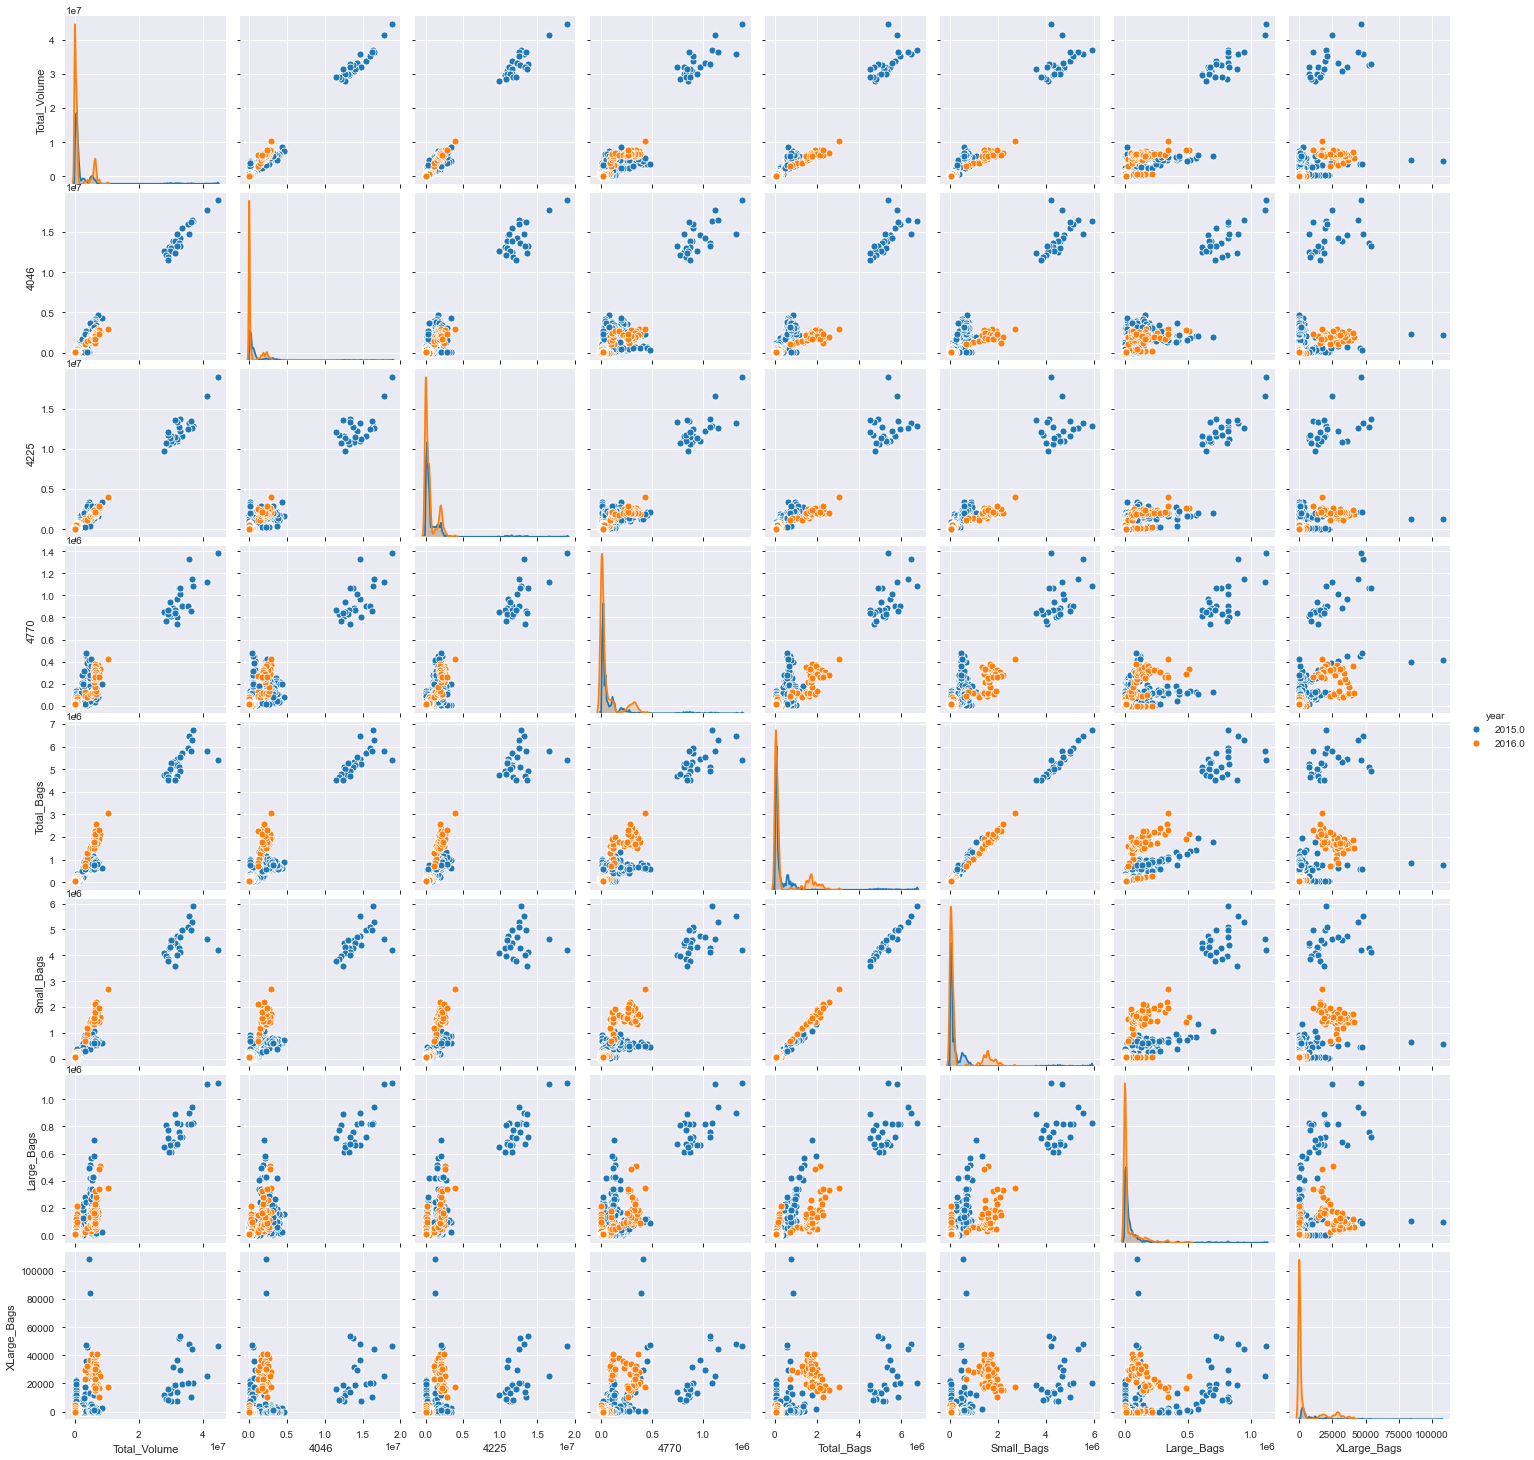

In [477]:
sns.pairplot(df,hue='year')

# Data Processing

Let us encode the categorical features of Year and Region.

In [478]:
LE=LabelEncoder()
df["region"]=LE.fit_transform(df["region"])
df["year"]=LE.fit_transform(df["year"])

In [479]:
df['year'].value_counts()

0    1270
1     247
Name: year, dtype: int64

In [480]:
df['region'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

Let us convert Date to Month and Day to find out whether any meaningful relationship exists with price.

In [481]:
df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)

In [482]:
df.head()

,Date,AveragePrice,Total_Volume,4046,4225,4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,year,region,Month,Day
0,2015-12-27,High,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,0,12,27
1,2015-12-20,High,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,0,12,20
2,2015-12-13,Medium,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,0,12,13
3,2015-06-12,Medium,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,0,6,12
4,2015-11-29,Medium,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,0,11,29


In [483]:
df.drop(['Date'],axis=1,inplace=True)

In [484]:
#Splitting the Target variables in x and y.
x = df.drop('AveragePrice', axis = 1)
y = df['AveragePrice']

In [485]:
#checking skewness
x.skew()

Total_Volume    6.200138
4046            6.051830
4225            6.394926
4770            5.405164
Total_Bags      5.366378
Small_Bags      5.355185
Large_Bags      5.144495
XLarge_Bags     5.775077
year            1.828332
region          0.288146
Month           0.101439
Day             0.041303
dtype: float64

As observed earlier, there is marked skewness in most of the features. We will use power tranform to handle the same.

In [486]:
#using power transform
from sklearn.preprocessing import power_transform
df_new=power_transform(x)

In [487]:
df_new=pd.DataFrame(df_new,columns=x.columns)
df_new.skew() #checking skewness post

Total_Volume    0.000000
4046           -0.012059
4225            0.008450
4770           -0.032945
Total_Bags      0.005205
Small_Bags      0.027632
Large_Bags     -0.074795
XLarge_Bags     0.417289
year            1.828332
region         -0.209568
Month          -0.139740
Day            -0.212528
dtype: float64

In [488]:
x=df_new

Let us check for outliers.

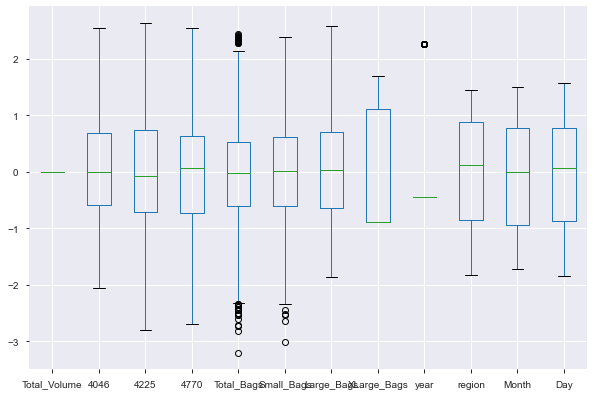

In [489]:
x.boxplot(figsize=[10,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

We notice that outliers are few and near the whiskers. Hence, they are not true outliers.

Now, let us scale the data using standard scaler.

In [490]:
std = StandardScaler()
x = std.fit_transform(x)

Let us now arrive at the optimal random state

In [491]:
from sklearn.linear_model import LogisticRegression
maxAccu=0
maxRS=0
for i in range(1,1000):
    x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.30, random_state=i)
    LR= LogisticRegression()
    LR.fit(x_train,y_train)
    predrf = LR.predict(x_test)
    acc= accuracy_score(y_test, predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is",maxAccu, "on Random_State ", maxRS)

Best accuracy is 0.8114035087719298 on Random_State  44


In [502]:
x_train,x_test, y_train,y_test= train_test_split(x,y,test_size=0.30, random_state=44)

In [503]:
from sklearn.linear_model import LogisticRegression

LR= LogisticRegression()
LR.fit(x_train,y_train)
predlr= LR.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.8114035087719298
[[  8   0  27]
 [  0  23  35]
 [  5  19 339]]
              precision    recall  f1-score   support

        High       0.62      0.23      0.33        35
         Low       0.55      0.40      0.46        58
      Medium       0.85      0.93      0.89       363

    accuracy                           0.81       456
   macro avg       0.67      0.52      0.56       456
weighted avg       0.79      0.81      0.79       456



In [504]:
from sklearn.tree import DecisionTreeClassifier

dt= DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt= dt.predict(x_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

0.8925438596491229
[[ 22   0  13]
 [  0  45  13]
 [ 12  11 340]]
              precision    recall  f1-score   support

        High       0.65      0.63      0.64        35
         Low       0.80      0.78      0.79        58
      Medium       0.93      0.94      0.93       363

    accuracy                           0.89       456
   macro avg       0.79      0.78      0.79       456
weighted avg       0.89      0.89      0.89       456



In [505]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.9451754385964912
[[ 27   0   8]
 [  0  47  11]
 [  2   4 357]]
              precision    recall  f1-score   support

        High       0.93      0.77      0.84        35
         Low       0.92      0.81      0.86        58
      Medium       0.95      0.98      0.97       363

    accuracy                           0.95       456
   macro avg       0.93      0.86      0.89       456
weighted avg       0.94      0.95      0.94       456



In [506]:
from sklearn.svm import SVC

svc=SVC()
svc.fit(x_train,y_train)
ad_pred=svc.predict(x_test)
print(accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

0.8728070175438597
[[ 14   0  21]
 [  0  35  23]
 [  1  13 349]]
              precision    recall  f1-score   support

        High       0.93      0.40      0.56        35
         Low       0.73      0.60      0.66        58
      Medium       0.89      0.96      0.92       363

    accuracy                           0.87       456
   macro avg       0.85      0.65      0.71       456
weighted avg       0.87      0.87      0.86       456



In [507]:
scr=cross_val_score(LR,x,y,cv=5)
print("Cross Validation Score of Logistic Regression Model:", scr.mean())

Cross Validation Score of Logistic Regression Model: 0.6366206357477854


In [508]:
scr=cross_val_score(dt,x,y,cv=5)
print("Cross Validation Score of Decision Tree Classifier Model:", scr.mean())

Cross Validation Score of Decision Tree Classifier Model: 0.4896061316657982


In [509]:
scr=cross_val_score(rf,x,y,cv=5)
print("Cross Validation Score of Random Forest Classifier Model:", scr.mean())

Cross Validation Score of Random Forest Classifier Model: 0.6015589716866423


In [510]:
scr=cross_val_score(svc,x,y,cv=5)
print("Cross Validation Score of Support Vector Classifier Model:", scr.mean())

Cross Validation Score of Support Vector Classifier Model: 0.6404920097272886


Hyper Parameter Tuning

In [526]:
#Creating Parameter list to pass in GridSearchCV

parameters= {'penalty' : ['l1', 'l2'],
             'C' : [0.001,0.01,0.1,1,10,100,1000], 'solver' : ['liblinear']}

In [527]:
GCV=GridSearchCV(LogisticRegression(), parameters, cv=5)

In [528]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']})

In [529]:
GCV.best_params_ # Printing the best parameter found by GridSearchCV

{'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}

In [530]:
GCV_pred=GCV.best_estimator_.predict(x_test)

In [531]:
accuracy_score(y_test,GCV_pred)

0.8070175438596491

In [501]:
import joblib
joblib.dump(best_model,"Avocado.pkl")

['Avocado.pkl']